In [473]:
#Memanggil Library yang diperlukan
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd

Dataset yang digunakan adalah <a href="https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)#">Indian Liver Patient Dataset</a>

Dataset yang akan diolah / dikonversi kedalam bentuk angka sehingga menghasilkan sebuah tabel/dataframe berupa angka/nilai karena pada ANN tidak dapat memproses data dalam bentuk teks. 

Fitur-fitur :
1. Age : Age of the patient
2. Gender (0=female, 1=male) : Gender of the patient
3. TB : Total Bilirubin
4. DB : Direct Bilirubin
5. Alkphos : Alkaline Phosphotase
6. Sgpt : Alamine Aminotransferase
7. Sgot : Aspartate Aminotransferase
8. TP : Total Protiens
9. ALB : Albumin
10. A/G : Ratio Albumin and Globulin Ratio

In [474]:
dataset = pd.read_csv('indian_liver_patient_dataset.csv',sep=';')


In [475]:
dataset

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,1
579,40,1,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,0
580,52,1,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,0
581,31,1,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,0


In [476]:
dataset = dataset.values

In [477]:
features = dataset[:,0:10]
labels = dataset[:,10]

In [478]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

## Spliting data

In [479]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.1, shuffle=True, stratify=labels)

In [480]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

## Model ANN 

In [481]:
model = Sequential()
model.add(Dense(units= 300, input_dim = 10, activation=relu))
model.add(Dense(units= 100, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

In [482]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=32, epochs=100)
acc_testing  = model.evaluate(testing_data, testing_label) 

Train on 524 samples, validate on 59 samples
Epoch 1/100
524/524 [==============================] - 1s 2ms/step - loss: 0.7029 - accuracy: 0.4637 - val_loss: 0.6963 - val_accuracy: 0.3051
Epoch 2/100
524/524 [==============================] - 0s 405us/step - loss: 0.6934 - accuracy: 0.5076 - val_loss: 0.6919 - val_accuracy: 0.6102
Epoch 3/100
524/524 [==============================] - 0s 420us/step - loss: 0.6924 - accuracy: 0.5439 - val_loss: 0.6876 - val_accuracy: 0.6610
Epoch 4/100
524/524 [==============================] - 0s 392us/step - loss: 0.6844 - accuracy: 0.5573 - val_loss: 0.6837 - val_accuracy: 0.7119
Epoch 5/100
524/524 [==============================] - 0s 348us/step - loss: 0.6849 - accuracy: 0.5363 - val_loss: 0.6797 - val_accuracy: 0.7119
Epoch 6/100
524/524 [==============================] - 0s 338us/step - loss: 0.6802 - accuracy: 0.5840 - val_loss: 0.6762 - val_accuracy: 0.7119
Epoch 7/100
524/524 [==============================] - 0s 348us/step - loss: 0.6772 - a

In [483]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.7118644118309021


In [484]:
acc_training.history

{'val_loss': [0.696251182232873,
  0.6918509471214424,
  0.6875697758238194,
  0.6837092132891639,
  0.6797338471574298,
  0.6761808132721205,
  0.6726328124434261,
  0.6693721332792508,
  0.6662440542447365,
  0.6632661779048079,
  0.6601643532009448,
  0.657203402559636,
  0.654587825476113,
  0.6522582001605276,
  0.6497657945600607,
  0.6473154718593016,
  0.6449934213848437,
  0.6428657669132039,
  0.6409407692440485,
  0.638942427554373,
  0.6370076607849638,
  0.635219968981662,
  0.6336084887132807,
  0.6319816779282134,
  0.6303670729620982,
  0.6289389355707977,
  0.6274062667862844,
  0.6260534353175405,
  0.6247163808951943,
  0.6233552441758624,
  0.6219541278936095,
  0.6207814691430431,
  0.619724858615358,
  0.6187568872661914,
  0.6176782361531662,
  0.6166980438313242,
  0.6157144995058997,
  0.6148158877582873,
  0.6140200212850409,
  0.6130875429864657,
  0.6122797414407892,
  0.6114525289858802,
  0.6107292296522755,
  0.6100335899045912,
  0.6093963313910921,
  0.

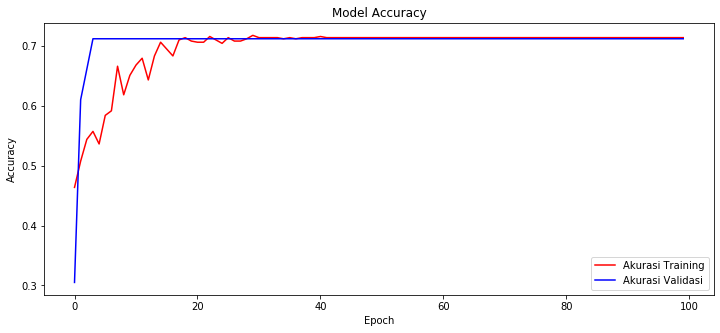

In [485]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

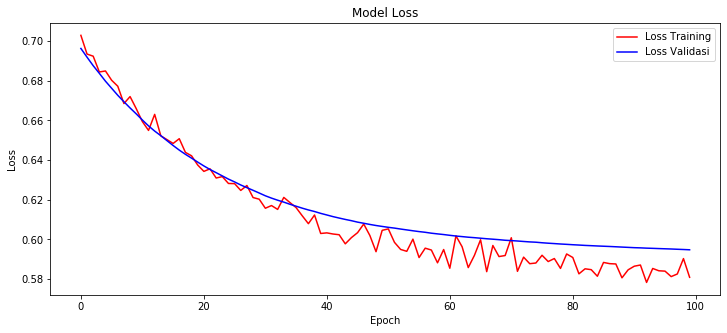

In [486]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

In [487]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [488]:
training_predicted

array([[0.24891287],
       [0.37203836],
       [0.2839749 ],
       [0.3016886 ],
       [0.34575003],
       [0.2673638 ],
       [0.235293  ],
       [0.2868415 ],
       [0.28854227],
       [0.26317796],
       [0.29050758],
       [0.28709564],
       [0.23378187],
       [0.23844877],
       [0.3468514 ],
       [0.3073492 ],
       [0.2804202 ],
       [0.31991798],
       [0.3168584 ],
       [0.36947203],
       [0.3154782 ],
       [0.32306194],
       [0.2566726 ],
       [0.36142325],
       [0.32674828],
       [0.28839976],
       [0.30619484],
       [0.27845997],
       [0.29159236],
       [0.28229058],
       [0.25130373],
       [0.26827183],
       [0.26492494],
       [0.29150748],
       [0.29704165],
       [0.28034902],
       [0.24487695],
       [0.33788309],
       [0.29443103],
       [0.2912688 ],
       [0.3532998 ],
       [0.2995019 ],
       [0.2961583 ],
       [0.2945038 ],
       [0.3023118 ],
       [0.27932203],
       [0.31041688],
       [0.302

## Hasil Evaluasi

In [489]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())


In [490]:
training_cm

array([[374,   0],
       [150,   0]], dtype=int64)

In [491]:
#Training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.7137404580152672
Sensitivity training 1.0
Precision training 0.7137404580152672
F1 Score training 0.8329621380846326


In [492]:
print(testing_cm)

[[42  0]
 [17  0]]


In [493]:
#Testing
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.711864406779661
Sensitivity testing 1.0
Precision testing 0.711864406779661
F1 Score testing 0.8316831683168318
